<a href="https://colab.research.google.com/github/Adithyan-mp/Sequence_Model/blob/main/BRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import re
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset,DataLoader
from torch import nn

In [ ]:
df= pd.read_csv('/content/Combined Data.csv')
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
print(df['status'].unique())
df.dropna(inplace=True)

['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
def clean(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z\s]","",text)
  text = re.sub(r"\s+"," ",text).strip()
  return text

df['clean_text'] = df['statement'].apply(clean)

In [ ]:
df.head()

,Unnamed: 0,statement,status,clean_text
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...


In [ ]:
def tokenization(text):
  return text.split()
df['token'] = df ['clean_text'].apply(tokenization)
df.head()

,Unnamed: 0,statement,status,clean_text,token
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo..."


In [ ]:
#building dictnory
all_tokens = [token for sentence in df['token'] for token in sentence]
word_freq = Counter(all_tokens)

vocab = {word : idx+2 for idx,(word,_) in enumerate(word_freq.most_common())}

vocab['<PAD>'] = 0
vocab['<EOS>'] = 1
vocab['<UNK>'] = 2

def encode_tokens(token,vocab):
  encoded_token=[vocab.get(word,vocab['<UNK>']) for word in token]
  encoded_token.append(vocab['<EOS>'])
  return encoded_token

df['input'] = df['token'].apply(lambda x : encode_tokens(x,vocab=vocab))

In [ ]:
MAX_LEN = 30

def pad_sequence_to_max(seq, max_len):
    if len(seq) < max_len:
        return seq + [0] * (max_len - len(seq))  # pad
    else:
        return seq[:max_len]  # truncate

df['padded_input'] = df['input'].apply(lambda x: pad_sequence_to_max(x, MAX_LEN))
df.head()

,Unnamed: 0,statement,status,clean_text,token,input,padded_input
0,0,oh my gosh,Anxiety,oh my gosh,"[oh, my, gosh]","[587, 6, 4707, 1]","[587, 6, 4707, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...,"[trouble, sleeping, confused, mind, restless, ...","[915, 625, 941, 258, 1201, 293, 32, 44, 9, 819...","[915, 625, 941, 258, 1201, 293, 32, 44, 9, 819..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...,"[all, wrong, back, off, dear, forward, doubt, ...","[32, 270, 93, 143, 2188, 573, 1111, 340, 16, 7...","[32, 270, 93, 143, 2188, 573, 1111, 340, 16, 7..."
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...,"[ive, shifted, my, focus, to, something, else,...","[114, 7096, 6, 680, 3, 100, 176, 17, 42, 97, 4...","[114, 7096, 6, 680, 3, 100, 176, 17, 42, 97, 4..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...,"[im, restless, and, restless, its, been, a, mo...","[42, 1201, 4, 1201, 58, 40, 7, 284, 57, 1326, ...","[42, 1201, 4, 1201, 58, 40, 7, 284, 57, 1326, ..."


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['status'])

In [ ]:

class SentimentDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_seq = torch.tensor(self.inputs[idx], dtype=torch.long)  # Convert to tensor
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Convert to tensor
        return input_seq, label


In [ ]:
import torch
import torch.nn as nn

class BRNN(nn.Module):
    def __init__(self, hidden_size, vocab_size, embedding_dim, output_size=7):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.h1 = nn.Linear(hidden_size + embedding_dim, hidden_size)
        self.out = nn.Linear(2*hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)


        prev_ac = torch.zeros(batch_size, self.hidden_size).to(x.device)
        embedded = self.embedding(x)
        #forward pass
        for t in range(seq_len):
            token_embed = embedded[:, t, :]
            combined = torch.cat((token_embed, prev_ac), dim=1)
            prev_ac = torch.tanh(self.h1(combined))
        forward_activation = prev_ac
        prev_ac = torch.zeros(batch_size, self.hidden_size).to(x.device)

        #backward pass
        for t in range(seq_len-1,-1,-1):
          token_embed = embedded[:,t,:]
          combined = torch.cat((token_embed,prev_ac),dim=1)
          prev_ac = torch.tanh(self.h1(combined))

        backward_activation = prev_ac
        total_activation = torch.cat((forward_activation,backward_activation),dim=1)
        output = self.out(total_activation)
        return output


In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# Assuming `df['padded_input']` and `df['label']` exist
X_train, X_test, y_train, y_test = train_test_split(
    df['padded_input'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42
)

# Create datasets
train_dataset = SentimentDataset(X_train, y_train)
test_dataset = SentimentDataset(X_test, y_test)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Model configuration
hidden_size = 120
vocab_size = len(vocab)  # Assuming vocab is already defined
embedding_dim = 200
output_size = 7

# Initialize the model, optimizer, and loss function
model = BRNN(hidden_size=hidden_size, vocab_size=vocab_size, embedding_dim=embedding_dim, output_size=output_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(10):
    for inputs, labels in train_loader:
        logits = model(inputs)


        loss = criterion(logits, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 1.5657
Epoch 2, Loss: 1.6259
Epoch 3, Loss: 1.7386
Epoch 4, Loss: 1.2277
Epoch 5, Loss: 1.3251
Epoch 6, Loss: 1.2305
Epoch 7, Loss: 1.6706
Epoch 8, Loss: 1.1856
Epoch 9, Loss: 1.1307
Epoch 10, Loss: 1.3063


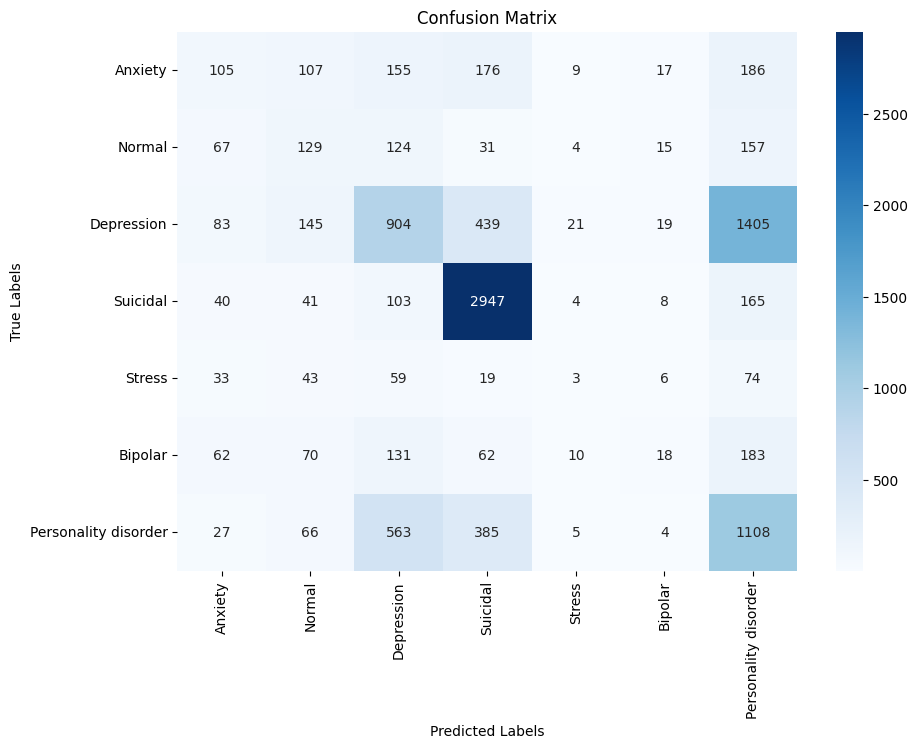

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the model is trained and the test_loader is prepared

def evaluate_model(model, test_loader, criterion):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient tracking for evaluation
        for inputs, labels in test_loader:
            # Forward pass
            logits = model(inputs)  # Get raw predictions
            _, preds = torch.max(logits, dim=1)  # Convert logits to class predictions

            all_preds.extend(preds.numpy())  # Store predictions
            all_labels.extend(labels.numpy())  # Store true labels

    return all_preds, all_labels

# Evaluate the model on test data
y_pred, y_true = evaluate_model(model, test_loader, criterion)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar', 'Personality disorder'], yticklabels=['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar', 'Personality disorder'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
